## 0. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df2 = df[df.churn=='yes']
df = df.append(df2)

In [4]:
df.reset_index(inplace=True)

In [24]:
df.shape

(4848, 21)

In [28]:
df.churn.value_counts()

no     3652
yes    1196
Name: churn, dtype: int64

In [50]:
df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 0 to 4244
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4848 non-null   int64  
 1   area_code                      4848 non-null   object 
 2   international_plan             4848 non-null   object 
 3   voice_mail_plan                4848 non-null   object 
 4   number_vmail_messages          4848 non-null   int64  
 5   total_day_minutes              4848 non-null   float64
 6   total_day_calls                4848 non-null   int64  
 7   total_day_charge               4848 non-null   float64
 8   total_eve_minutes              4848 non-null   float64
 9   total_eve_calls                4848 non-null   int64  
 10  total_eve_charge               4848 non-null   float64
 11  total_night_minutes            4848 non-null   float64
 12  total_night_calls              4848 non-null   i

## 1. Data Basics
#### Distribution

In [17]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,100.470710,7.220710,183.803507,99.977723,31.247123,201.381621,100.135107,17.117663,201.243791,99.761757,9.056104,10.302496,4.400578,2.782186,1.647483
std,39.658824,13.220791,56.887760,19.993343,9.670936,50.479266,19.887732,4.290739,50.215052,20.113254,2.259690,2.766847,2.484533,0.747015,1.405180
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.975000,87.000000,24.475000,167.300000,87.000000,14.220000,167.800000,86.000000,7.550000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,182.650000,100.000000,31.050000,202.200000,100.000000,17.190000,201.500000,100.000000,9.070000,10.400000,4.000000,2.810000,1.000000
75%,127.000000,0.000000,222.100000,113.000000,37.760000,235.300000,114.000000,20.000000,235.300000,113.250000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
np.unique(df.area_code)

array(['area_code_408', 'area_code_415', 'area_code_510'], dtype=object)

In [5]:
# This variable makes no sense, so for now i would drop it
df = df.drop('area_code', 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [10]:
df.drop_duplicates(subset=['state','area_code']).sort_values(by='state').head(20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
114,AK,127,area_code_510,no,yes,36,183.2,117,31.14,126.8,76,10.78,263.3,71,11.85,11.2,8,3.02,1,no
30,AK,136,area_code_415,yes,yes,33,203.9,106,34.66,187.6,99,15.95,101.7,107,4.58,10.5,6,2.84,3,no
28,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
113,AL,91,area_code_510,yes,no,0,129.9,112,22.08,173.3,83,14.73,247.2,130,11.12,11.2,3,3.02,3,no
93,AL,98,area_code_408,no,no,0,161.0,117,27.37,190.9,113,16.23,227.7,113,10.25,12.1,4,3.27,4,no
179,AL,106,area_code_415,no,no,0,223.0,121,37.91,110.1,98,9.36,188.7,107,8.49,7.1,12,1.92,0,no
77,AR,80,area_code_415,no,no,0,124.3,100,21.13,173.0,107,14.71,253.2,62,11.39,7.9,9,2.13,1,no
33,AR,34,area_code_510,no,no,0,124.8,82,21.22,282.2,98,23.99,311.5,78,14.02,10.0,4,2.70,2,no
112,AR,163,area_code_408,no,no,0,197.0,109,33.49,202.6,128,17.22,206.4,80,9.29,9.1,10,2.46,1,no
176,AZ,144,area_code_510,yes,no,0,203.5,100,34.60,247.6,103,21.05,194.3,94,8.74,11.9,11,3.21,0,no


array([[<AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>],
       [<AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>],
       [<AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>],
       [<AxesSubplot:title={'center':'total_intl_minutes'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>]], dtype=object)

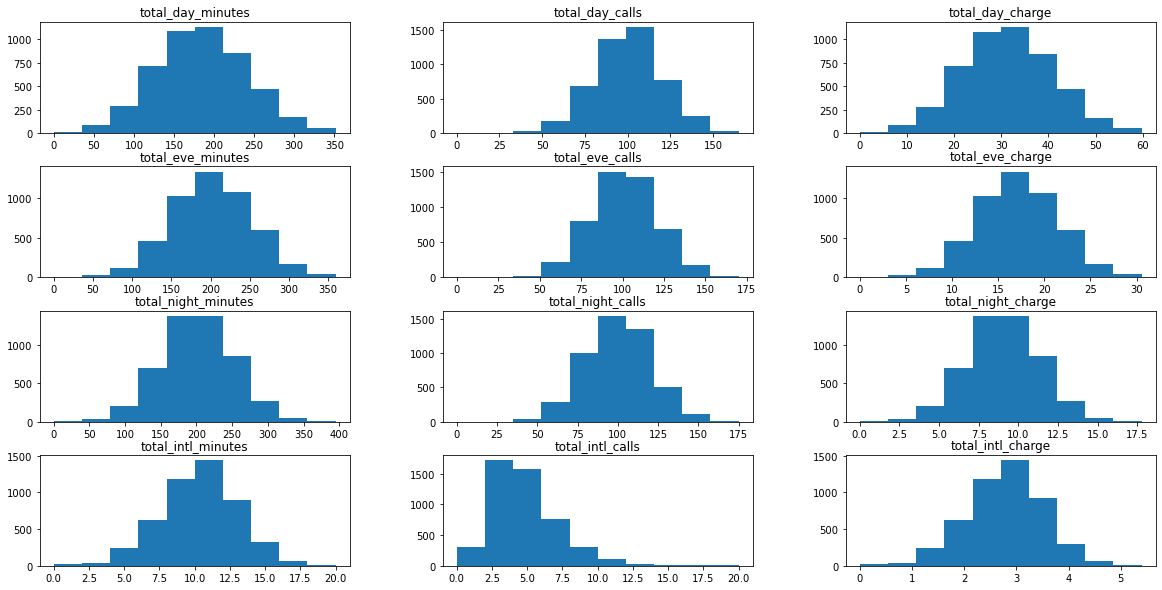

In [29]:
df[['total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge']].hist(figsize=(20,10),grid=False)

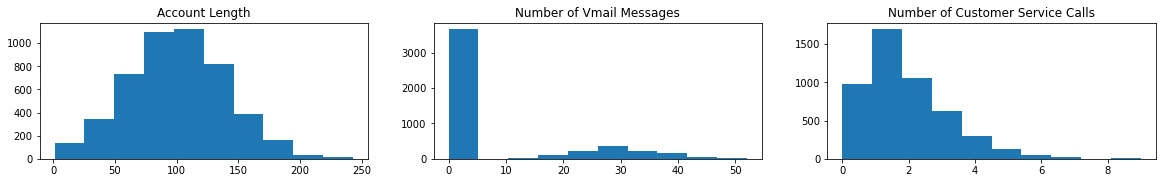

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(20,2.5))

account_length = df.account_length.hist(ax=axes[0],grid=False).set_title('Account Length')
number_vmail_messages = df.number_vmail_messages.hist(ax=axes[1],grid=False).set_title('Number of Vmail Messages')
c = df.number_customer_service_calls.hist(ax=axes[2],grid=False).set_title('Number of Customer Service Calls')


In [54]:
# now check the categorical variables...
df.international_plan.value_counts()

no     4285
yes     563
Name: international_plan, dtype: int64

In [6]:
# map categorical variables to ints
df['int_plan'] = [s=='yes' for s in df['international_plan']]
df['v_mail_plan'] = [s=='yes' for s in df['voice_mail_plan']]
df.head()

,index,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,int_plan,v_mail_plan
0,0,OH,107,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,no,False,True
1,1,NJ,137,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,no,False,False
2,2,OH,84,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,no,True,False
3,3,OK,75,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,no,True,False
4,4,MA,121,no,yes,24,218.2,88,37.09,348.5,...,212.6,118,9.57,7.5,7,2.03,3,no,False,True


In [7]:
df['churn'] = [s=='yes' for s in df['churn']]


In [71]:
df.columns

Index(['index', 'account_length', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'churn', 'int_plan', 'v_mail_plan'],
      dtype='object')

* voice_mail_plan:1112
* international_plan:396

#### Correlation

In [42]:
df.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


In [61]:
df.reset_index(inplace=True)

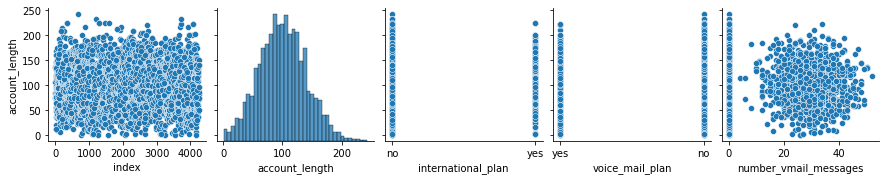

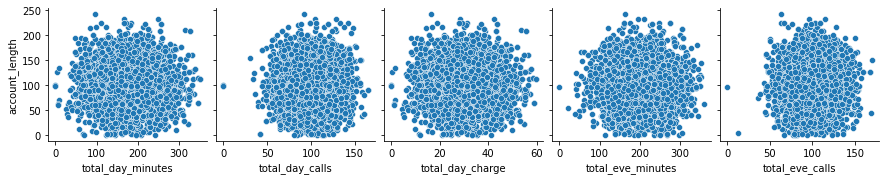

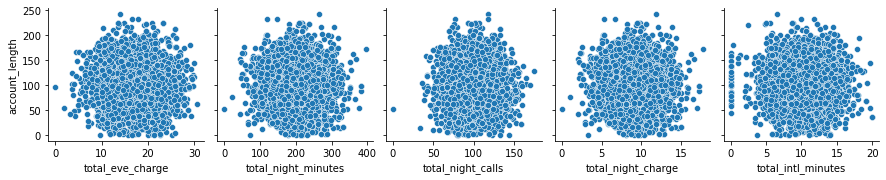

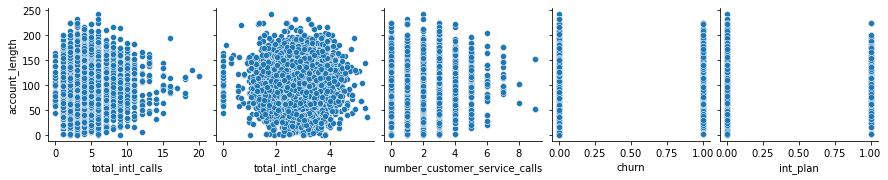

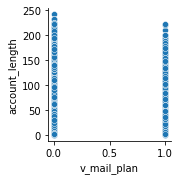

In [62]:
import seaborn as sns
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['account_length'])

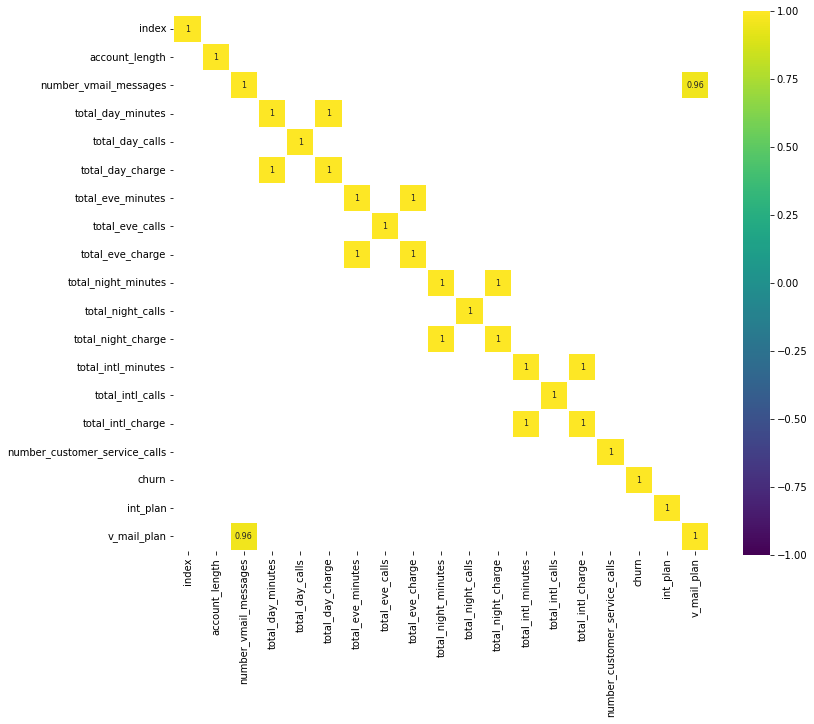

In [65]:
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

minutes and charge variables have a correlation of 1. So I drop minutes columns and number_vmail_messages column.

In [51]:
X_test.shape

(1455, 12)

In [8]:
# exclude highly correlated predictors...
df.drop(labels=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge','number_vmail_messages'],
        inplace=True, axis=1)
df.columns

Index(['index', 'state', 'account_length', 'international_plan',
       'voice_mail_plan', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'churn', 'int_plan', 'v_mail_plan'],
      dtype='object')

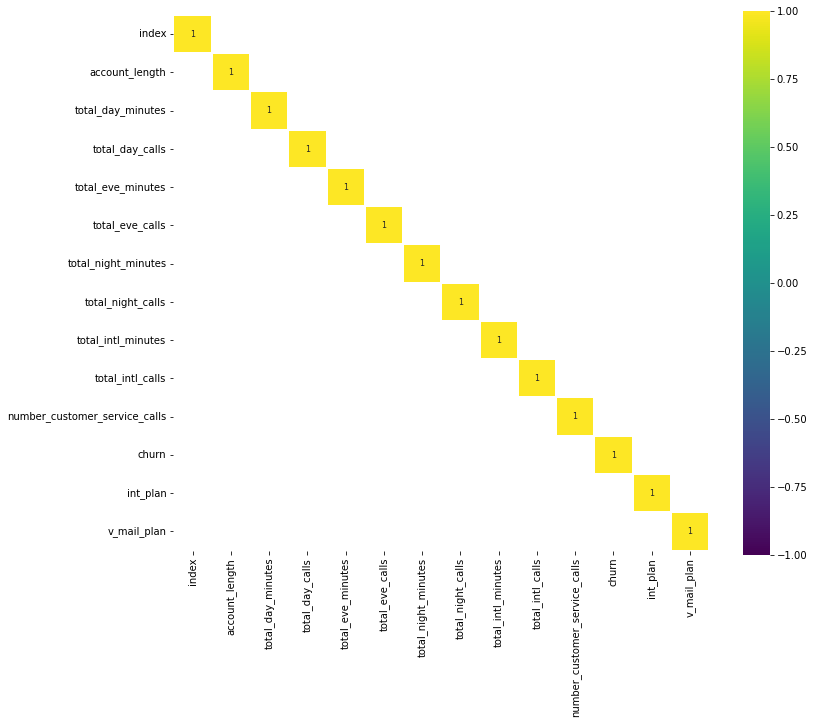

In [68]:
# Try again see if it works
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## 2. Models

#### 2.0 Data preprocessing

In [9]:
cat = df[['int_plan', 'v_mail_plan']]
no_cat = df[['account_length', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']]


In [23]:
# Now combine X, y, and split train & test dataset
X = pd.concat([cat, no_cat_stddf], axis=1, ignore_index=True)
X.columns = list(cat.columns) + list(no_cat_stddf.columns)
Y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7,stratify=df['churn'])


In [10]:
# Standardize non categorical variables
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [11]:
no_cat.describe()

,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
count,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,100.470710,183.803507,99.977723,201.381621,100.135107,201.243791,99.761757,10.302496,4.400578,1.647483
std,39.658824,56.887760,19.993343,50.479266,19.887732,50.215052,20.113254,2.766847,2.484533,1.405180
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,143.975000,87.000000,167.300000,87.000000,167.800000,86.000000,8.600000,3.000000,1.000000
50%,100.000000,182.650000,100.000000,202.200000,100.000000,201.500000,100.000000,10.400000,4.000000,1.000000
75%,127.000000,222.100000,113.000000,235.300000,114.000000,235.300000,113.250000,12.100000,6.000000,2.000000
max,243.000000,351.500000,165.000000,359.300000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000


In [12]:
no_cat_stddf = pd.DataFrame(no_cat_std, columns=no_cat.columns)
no_cat_stddf.describe()

,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
count,4.848000e+03,4.848000e+03,4.848000e+03,4.848000e+03,4.848000e+03,4.848000e+03,4.848000e+03,4.848000e+03,4.848000e+03,4.848000e+03
mean,-8.546233e-17,1.328237e-16,-2.641589e-16,3.580744e-16,-1.169078e-17,-2.579528e-16,3.609141e-17,-3.503798e-18,9.226095e-17,2.011936e-15
std,1.000103e+00,1.000103e+00,1.000103e+00,1.000103e+00,1.000103e+00,1.000103e+00,1.000103e+00,1.000103e+00,1.000103e+00,1.000103e+00
min,-2.508420e+00,-3.231318e+00,-5.001066e+00,-3.989804e+00,-5.035538e+00,-4.008052e+00,-4.960513e+00,-3.723936e+00,-1.771371e+00,-1.172557e+00
25%,-6.927473e-01,-7.001966e-01,-6.491691e-01,-6.752304e-01,-6.605309e-01,-6.660800e-01,-6.842840e-01,-6.153834e-01,-5.637767e-01,-4.608309e-01
50%,-1.187020e-02,-2.027898e-02,1.114347e-03,1.621385e-02,-6.794199e-03,5.102756e-03,1.184628e-02,3.524380e-02,-1.612451e-01,-4.608309e-01
75%,6.690069e-01,6.732633e-01,6.513978e-01,6.719963e-01,6.972300e-01,6.782771e-01,6.706838e-01,6.497250e-01,6.438180e-01,2.508952e-01
max,3.594257e+00,2.948152e+00,3.252532e+00,3.128704e+00,3.513327e+00,3.858927e+00,3.741115e+00,3.505255e+00,6.279260e+00,5.232978e+00


In [15]:
list(cat.columns)

['int_plan', 'v_mail_plan']

In [14]:
# Now combine X, y, and split train & test dataset
X = pd.concat([cat, no_cat_stddf], axis=1, ignore_index=True)
X.columns = list(cat.columns) + list(no_cat_stddf.columns)
Y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7,stratify=df['churn'])


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.metrics
from xgboost import XGBClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
import lucem_illud

In [107]:
import sys
!conda install --yes --prefix {sys.prefix} xgboost

^C

CondaError: KeyboardInterrupt



In [150]:
X_test.head()

,int_plan,v_mail_plan,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
2661,False,False,-0.238829,-0.643500,1.051572,-0.518714,-0.660531,-1.293447,-0.982625,1.083476,-0.563777,0.250895
4604,False,False,-0.037088,1.276267,-2.800107,0.259903,0.244643,0.646411,-1.231243,-0.868405,-1.368840,0.962621
3491,False,False,1.879455,0.021035,0.201202,2.464996,-0.710818,-2.307191,0.260464,1.553374,-0.966308,-0.460831
4782,True,False,0.946401,1.358895,-0.198973,-0.603907,0.998955,-2.591996,-0.535113,-3.723936,-1.771371,0.962621
2016,False,False,0.341177,0.070260,0.451311,-0.926845,-0.157657,0.252066,0.111293,-0.073194,-0.563777,0.250895


In [15]:
test_DF = pd.DataFrame()
test_DF['vect'] = X_test.values.tolist()
test_DF['category'] = y_test.values
test_DF.shape

(1455, 2)

#### Helper function

In [19]:
def evaluateClassifier(clf, X_test, y_test):
    predictions = clf.predict(X_test)
    classes = []
    results = {
        'Error_Rate' : [],
        'AUC' : [],
        'Precision' : [],
        'Average_Precision' : [],
        'Recall' : [],
        }

    for cat in set(y_test):
        preds = [True if (c == cat) else False for c in predictions]
        acts = [True if (c == cat) else False for c in y_test.values]
        classes.append(cat)
        results['AUC'].append(sklearn.metrics.roc_auc_score(acts, preds))
        results['Average_Precision'].append(sklearn.metrics.average_precision_score(acts, preds))
        results['Precision'].append(sklearn.metrics.precision_score(acts, preds))
        results['Recall'].append(sklearn.metrics.recall_score(acts, preds))
        results['Error_Rate'].append(1 -  sklearn.metrics.accuracy_score(acts, preds))
    df = pd.DataFrame(results, index=classes)
    df.index.rename('Churn', inplace=True)
    return df


In [58]:
comp = pd.DataFrame(columns=X_train.columns)


### 2.1 Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=314).fit(X_train, y_train)
round(clf_lr.score(X_test, y_test), 4)


0.7842

In [61]:
comp.loc['LR'] = clf_lr.coef_[0]


,int_plan,v_mail_plan,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
LR,2.137536,-1.069625,0.045515,0.827259,0.055652,0.248129,-0.001181,0.186633,-0.066756,0.212083,-0.065454,0.844004


In [136]:
evaluateClassifier(clf_lr, X_test, y_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Churn,,,,,
False,0.215808,0.640408,0.814309,0.809686,0.924270
True,0.215808,0.640408,0.606635,0.375056,0.356546


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


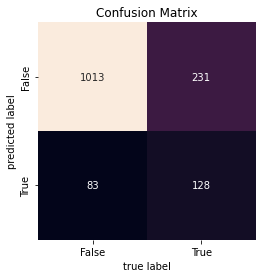

In [139]:
lucem_illud.plotConfusionMatrix(clf_lr, test_DF)

### 2.2 SVM

In [63]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear', probability = False)
clf_svm.fit(X_train, y_train)
round(clf_svm.score(X_test, y_test), 4)

0.789

In [64]:
comp.loc['SVM'] = clf_svm.coef_[0]


In [164]:
evaluateClassifier(clf_svm, X_test, y_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Churn,,,,,
False,0.210997,0.634236,0.810386,0.806946,0.939781
True,0.210997,0.634236,0.641304,0.376427,0.328691


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


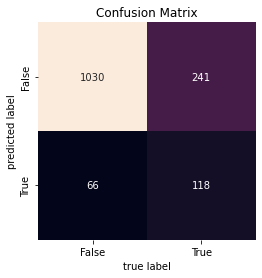

In [165]:
lucem_illud.plotConfusionMatrix(clf_svm, test_DF)

In [69]:
comp

,int_plan,v_mail_plan,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
LR,2.137536,-1.069625,0.045515,0.827259,0.055652,0.248129,-0.001181,0.186633,-0.066756,0.212083,-0.065454,0.844004
SVM,1.652363,-0.744915,0.027438,0.473456,0.040132,0.156177,-0.005222,0.109039,-0.042691,0.124197,-0.066777,0.456468


### 2.3 KNN

In [47]:
clf_knn = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
clf_knn.fit(X_train, y_train)
round(clf_knn.score(X_test, y_test), 4)

0.9258

In [20]:
evaluateClassifier(clf_knn, X_test, y_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Churn,,,,,
False,0.074227,0.888917,0.941071,0.933874,0.961679
True,0.074227,0.888917,0.874627,0.759193,0.816156


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


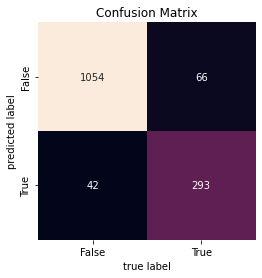

In [22]:
lucem_illud.plotConfusionMatrix(clf_knn, test_DF)

In [44]:
from sklearn.model_selection import GridSearchCV
def cv_knn(X_train, y_train, X_test, y_test):
    knn = sklearn.neighbors.KNeighborsClassifier()
    param = {"n_neighbors": [i for i in range(1,10)], 
             "weights": ['uniform', 'distance']}
    gscv = GridSearchCV(knn, param_grid=param, cv=10)
    gscv.fit(X_train, y_train)
    print('best results: ', gscv.best_score_)
    print('best k: ', gscv.best_params_)
    

In [45]:
cv_knn(X_train, y_train, X_test, y_test)

best results:  0.9177780669790041
best k:  {'n_neighbors': 9, 'weights': 'distance'}


In [48]:
clf_knn = sklearn.neighbors.KNeighborsClassifier(9, weights='distance')
clf_knn.fit(X_train, y_train)
round(clf_knn.score(X_test, y_test), 4)

0.9326

In [65]:
comp.loc['KNN'] = clf_knn.coef_[0]
# KNN does not provide a prediction for the importance 
# or coefficients of variables. 

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [49]:
evaluateClassifier(clf_knn, X_test, y_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Churn,,,,,
False,0.067354,0.891606,0.940035,0.934923,0.972628
True,0.067354,0.891606,0.906542,0.781565,0.810585


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


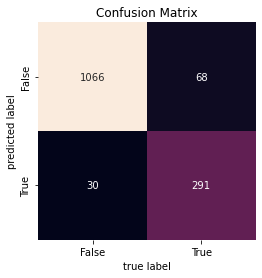

In [50]:
lucem_illud.plotConfusionMatrix(clf_knn, test_DF)

### 2.4 RF

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)
round(clf_rf.score(X_test, y_test), 4)

0.767

In [167]:
evaluateClassifier(clf_rf, X_test, y_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Churn,,,,,
False,0.23299,0.528792,0.764131,0.764121,0.999088
True,0.23299,0.528792,0.954545,0.288139,0.058496


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


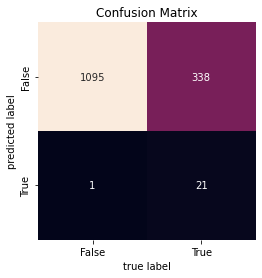

In [168]:
lucem_illud.plotConfusionMatrix(clf_rf, test_DF)